In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.layers import LeakyReLU, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import mnist

(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 127.5 - 1.0
X_train = np.expand_dims(X_train, axis=-1)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
generator = Sequential()
generator.add(Dense(256, input_dim=100))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(28 * 28, activation='tanh'))
generator.add(Reshape((28, 28, 1)))

In [4]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=(28, 28, 1)))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
discriminator.trainable = False

In [5]:
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [6]:
batch_size = 64
epochs = 50
sample_interval = 5

d_loss_history = []
g_loss_history = []
d_accuracy_history = []

2/2 [==============================] - 0s 8ms/step
Epoch 0, D Loss: 0.7201258540153503, D Accuracy: 37.5, G Loss: 0.8733927607536316
1/1 [==============================] - 0s 57ms/step


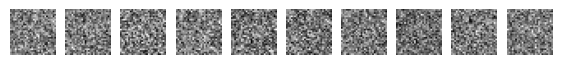

2/2 [==============================] - 0s 5ms/step
Epoch 5, D Loss: 0.0894938037963584, D Accuracy: 100.0, G Loss: 4.073003768920898
1/1 [==============================] - 0s 16ms/step


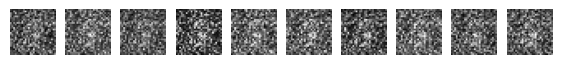

2/2 [==============================] - 0s 7ms/step
Epoch 10, D Loss: 0.7588266637176275, D Accuracy: 50.0, G Loss: 1.3582663536071777
1/1 [==============================] - 0s 20ms/step


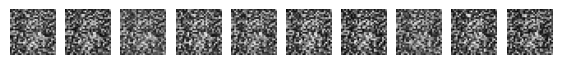

2/2 [==============================] - 0s 6ms/step
Epoch 15, D Loss: 0.16980958147905767, D Accuracy: 99.21875, G Loss: 3.9864048957824707
1/1 [==============================] - 0s 16ms/step


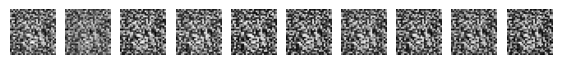

2/2 [==============================] - 0s 9ms/step
Epoch 20, D Loss: 0.14212636649608612, D Accuracy: 99.21875, G Loss: 5.783893585205078
1/1 [==============================] - 0s 18ms/step


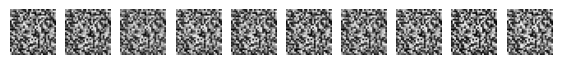

2/2 [==============================] - 0s 5ms/step
Epoch 25, D Loss: 0.03850558481644839, D Accuracy: 100.0, G Loss: 8.018930435180664
1/1 [==============================] - 0s 21ms/step


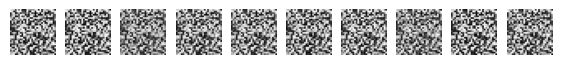

2/2 [==============================] - 0s 7ms/step
Epoch 30, D Loss: 0.0029925897833891213, D Accuracy: 100.0, G Loss: 9.851114273071289
1/1 [==============================] - 0s 17ms/step


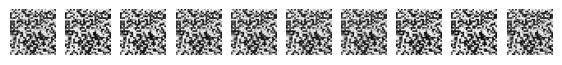

2/2 [==============================] - 0s 12ms/step
Epoch 35, D Loss: 0.0009918841533362865, D Accuracy: 100.0, G Loss: 10.034019470214844
1/1 [==============================] - 0s 81ms/step


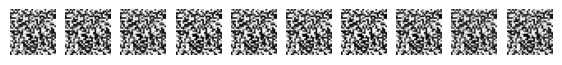

2/2 [==============================] - 0s 12ms/step
Epoch 40, D Loss: 0.001580526033649221, D Accuracy: 100.0, G Loss: 9.047842979431152
1/1 [==============================] - 0s 22ms/step


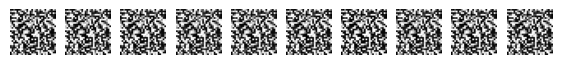

2/2 [==============================] - 0s 12ms/step
Epoch 45, D Loss: 0.002054016644251533, D Accuracy: 100.0, G Loss: 6.87055778503418
1/1 [==============================] - 0s 18ms/step


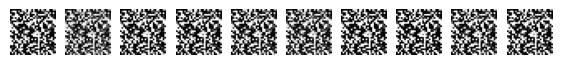

2/2 [==============================] - 0s 9ms/step


In [7]:
for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_imgs = X_train[idx]
    fake_imgs = generator.predict(np.random.normal(0, 1, (batch_size, 100)))

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    d_real_loss = discriminator.train_on_batch(real_imgs, real_labels)
    d_fake_loss = discriminator.train_on_batch(fake_imgs, fake_labels)

    d_loss = 0.5 * np.add(d_real_loss, d_fake_loss)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real_labels)

    d_loss_history.append(d_loss[0])
    g_loss_history.append(g_loss)
    d_accuracy_history.append(100 * d_loss[1])

    # Print progress
    if epoch % sample_interval == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, D Accuracy: {100 * d_loss[1]}, G Loss: {g_loss}")

        samples = 10
        noise = np.random.normal(0, 1, (samples, 100))
        generated_images = generator.predict(noise)
        generated_images = 0.5 * generated_images + 0.5

        plt.figure(figsize=(7, 7))
        for i in range(samples):
            plt.subplot(1, samples, i + 1)
            plt.imshow(generated_images[i, :, :, 0], cmap='gray')
            plt.axis('off')
        plt.show()

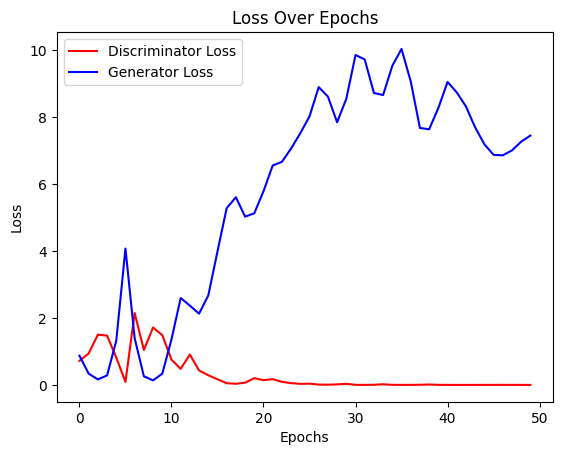

In [8]:
plt.plot(d_loss_history, label='Discriminator Loss', color='red')
plt.plot(g_loss_history, label='Generator Loss', color='blue')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

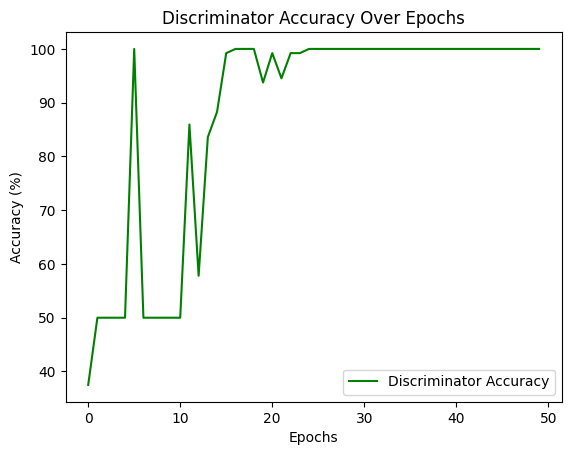

In [9]:
plt.plot(d_accuracy_history, label='Discriminator Accuracy', color='green')
plt.title('Discriminator Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()